## Preparing and visualizing skeletal tracking

* Dataset: `ant_tabletop`
* Date of explorations in notebook: April 20, 2018 by Emily 

This is a continuation of the work we did last quarter (see `winter2018/kinect_kmeans_markov_emily.ipynb`). I will try to clean up the code and run this with the ant_tabletop data we collected last week!

In [1]:
# Import software libraries
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns # for the nicer default plot aesthetics 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# % matplotlib notebook # See https://github.com/matplotlib/matplotlib/issues/4879
from IPython.display import display
pd.options.display.max_columns = None
import pprint as pp
import helpers # written by us for MMLA pipeline purposes
# automatically refresh if anything has changed in a backend file
%load_ext autoreload
%autoreload 2

In [2]:
skeleton_df = pd.read_csv('ant_tabletop_data/mid/mid_kinect.csv', sep=';', names=helpers.col_names())

# Drop all the lower body positions before clustering/analyzing
skeleton_df = helpers.drop_lower_parts(skeleton_df)

# Check 
display(skeleton_df.head())

,SHOULDER_CENTER_POS_X_P1,SHOULDER_CENTER_POS_Y_P1,SHOULDER_CENTER_POS_Z_P1,HEAD_POS_X_P1,HEAD_POS_Y_P1,HEAD_POS_Z_P1,SHOULDER_LEFT_POS_X_P1,SHOULDER_LEFT_POS_Y_P1,SHOULDER_LEFT_POS_Z_P1,ELBOW_LEFT_POS_X_P1,ELBOW_LEFT_POS_Y_P1,ELBOW_LEFT_POS_Z_P1,WRIST_LEFT_POS_X_P1,WRIST_LEFT_POS_Y_P1,WRIST_LEFT_POS_Z_P1,HAND_LEFT_POS_X_P1,HAND_LEFT_POS_Y_P1,HAND_LEFT_POS_Z_P1,SHOULDER_RIGHT_POS_X_P1,SHOULDER_RIGHT_POS_Y_P1,SHOULDER_RIGHT_POS_Z_P1,ELBOW_RIGHT_POS_X_P1,ELBOW_RIGHT_POS_Y_P1,ELBOW_RIGHT_POS_Z_P1,WRIST_RIGHT_POS_X_P1,WRIST_RIGHT_POS_Y_P1,WRIST_RIGHT_POS_Z_P1,HAND_RIGHT_POS_X_P1,HAND_RIGHT_POS_Y_P1,HAND_RIGHT_POS_Z_P1,SHOULDER_CENTER_POS_X_P2,SHOULDER_CENTER_POS_Y_P2,SHOULDER_CENTER_POS_Z_P2,HEAD_POS_X_P2,HEAD_POS_Y_P2,HEAD_POS_Z_P2,SHOULDER_LEFT_POS_X_P2,SHOULDER_LEFT_POS_Y_P2,SHOULDER_LEFT_POS_Z_P2,ELBOW_LEFT_POS_X_P2,ELBOW_LEFT_POS_Y_P2,ELBOW_LEFT_POS_Z_P2,WRIST_LEFT_POS_X_P2,WRIST_LEFT_POS_Y_P2,WRIST_LEFT_POS_Z_P2,HAND_LEFT_POS_X_P2,HAND_LEFT_POS_Y_P2,HAND_LEFT_POS_Z_P2,SHOULDER_RIGHT_POS_X_P2,SHOULDER_RIGHT_POS_Y_P2,SHOULDER_RIGHT_POS_Z_P2,ELBOW_RIGHT_POS_X_P2,ELBOW_RIGHT_POS_Y_P2,ELBOW_RIGHT_POS_Z_P2,WRIST_RIGHT_POS_X_P2,WRIST_RIGHT_POS_Y_P2,WRIST_RIGHT_POS_Z_P2,HAND_RIGHT_POS_X_P2,HAND_RIGHT_POS_Y_P2,HAND_RIGHT_POS_Z_P2
0,0.202749,0.396598,1.603580,0.179872,0.561832,1.593809,0.065254,0.307486,1.647036,0.036887,0.115245,1.719840,0.042921,-0.070011,1.730999,0.051708,-0.127588,1.723682,0.352194,0.277652,1.595460,0.449398,0.088485,1.656293,0.453102,-0.097573,1.660062,0.454337,-0.159592,1.665029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.202749,0.396598,1.603580,0.179872,0.561832,1.593809,0.065254,0.307486,1.647036,0.036887,0.115245,1.719840,0.042921,-0.070011,1.730999,0.051708,-0.127588,1.723682,0.352194,0.277652,1.595460,0.449398,0.088485,1.656293,0.453102,-0.097573,1.660062,0.454337,-0.159592,1.665029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.202975,0.396783,1.603888,0.182700,0.562026,1.594795,0.066239,0.307567,1.646707,0.036979,0.115778,1.719658,0.045775,-0.068880,1.731487,0.055850,-0.126064,1.724003,0.353626,0.277080,1.595718,0.449776,0.088471,1.656415,0.456072,-0.096917,1.662446,0.513346,-0.105472,1.653843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.202975,0.396783,1.603888,0.182700,0.562026,1.594795,0.066239,0.307567,1.646707,0.036979,0.115778,1.719658,0.045775,-0.068880,1.731487,0.055850,-0.126064,1.724003,0.353626,0.277080,1.595718,0.449776,0.088471,1.656415,0.456072,-0.096917,1.662446,0.513346,-0.105472,1.653843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.203399,0.397442,1.604534,0.183761,0.562260,1.594947,0.067789,0.308615,1.645975,0.037571,0.115492,1.719979,0.051995,-0.067559,1.737945,0.061906,-0.124593,1.730206,0.354921,0.276535,1.595915,0.450066,0.089576,1.655994,0.458868,-0.095109,1.664251,0.510217,-0.122452,1.659088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Clustering

In [3]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(skeleton_df)

# Check as desired
# print(kmeans.labels_)
# kmeans.predict([[unseen data goes here]])
# kmeans.cluster_centers_

Text(0.5,1,'Clustering overview')

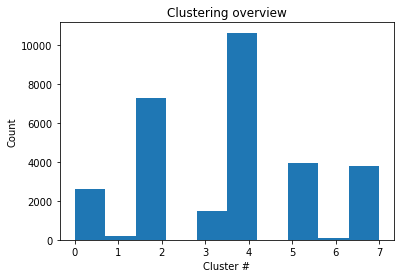

In [4]:
# plot an overview of how many points are in each cluster...
fig, ax = plt.subplots(1,1)
plt.hist(kmeans.labels_)
ax.plot()
ax.set_xlabel('Cluster #')
ax.set_ylabel('Count')
ax.set_title('Clustering overview')

In [5]:
# Add ClusterLabel column to dataframes
skeleton_df.loc[:, 'ClusterLabel'] = kmeans.labels_

# Plottable dataframe
kinect_xyz_df = helpers.create_xyz_df(skeleton_df)

# Check 
kinect_xyz_df.head()

,SHOULDER_CENTER_POS_X_P1,SHOULDER_CENTER_POS_Y_P1,SHOULDER_CENTER_POS_Z_P1,HEAD_POS_X_P1,HEAD_POS_Y_P1,HEAD_POS_Z_P1,SHOULDER_LEFT_POS_X_P1,SHOULDER_LEFT_POS_Y_P1,SHOULDER_LEFT_POS_Z_P1,ELBOW_LEFT_POS_X_P1,ELBOW_LEFT_POS_Y_P1,ELBOW_LEFT_POS_Z_P1,WRIST_LEFT_POS_X_P1,WRIST_LEFT_POS_Y_P1,WRIST_LEFT_POS_Z_P1,HAND_LEFT_POS_X_P1,HAND_LEFT_POS_Y_P1,HAND_LEFT_POS_Z_P1,SHOULDER_RIGHT_POS_X_P1,SHOULDER_RIGHT_POS_Y_P1,SHOULDER_RIGHT_POS_Z_P1,ELBOW_RIGHT_POS_X_P1,ELBOW_RIGHT_POS_Y_P1,ELBOW_RIGHT_POS_Z_P1,WRIST_RIGHT_POS_X_P1,WRIST_RIGHT_POS_Y_P1,WRIST_RIGHT_POS_Z_P1,HAND_RIGHT_POS_X_P1,HAND_RIGHT_POS_Y_P1,HAND_RIGHT_POS_Z_P1,SHOULDER_CENTER_POS_X_P2,SHOULDER_CENTER_POS_Y_P2,SHOULDER_CENTER_POS_Z_P2,HEAD_POS_X_P2,HEAD_POS_Y_P2,HEAD_POS_Z_P2,SHOULDER_LEFT_POS_X_P2,SHOULDER_LEFT_POS_Y_P2,SHOULDER_LEFT_POS_Z_P2,ELBOW_LEFT_POS_X_P2,ELBOW_LEFT_POS_Y_P2,ELBOW_LEFT_POS_Z_P2,WRIST_LEFT_POS_X_P2,WRIST_LEFT_POS_Y_P2,WRIST_LEFT_POS_Z_P2,HAND_LEFT_POS_X_P2,HAND_LEFT_POS_Y_P2,HAND_LEFT_POS_Z_P2,SHOULDER_RIGHT_POS_X_P2,SHOULDER_RIGHT_POS_Y_P2,SHOULDER_RIGHT_POS_Z_P2,ELBOW_RIGHT_POS_X_P2,ELBOW_RIGHT_POS_Y_P2,ELBOW_RIGHT_POS_Z_P2,WRIST_RIGHT_POS_X_P2,WRIST_RIGHT_POS_Y_P2,WRIST_RIGHT_POS_Z_P2,HAND_RIGHT_POS_X_P2,HAND_RIGHT_POS_Y_P2,HAND_RIGHT_POS_Z_P2
0,0.202749,0.396598,1.603580,0.179872,0.561832,1.593809,0.065254,0.307486,1.647036,0.036887,0.115245,1.719840,0.042921,-0.070011,1.730999,0.051708,-0.127588,1.723682,0.352194,0.277652,1.595460,0.449398,0.088485,1.656293,0.453102,-0.097573,1.660062,0.454337,-0.159592,1.665029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.202749,0.396598,1.603580,0.179872,0.561832,1.593809,0.065254,0.307486,1.647036,0.036887,0.115245,1.719840,0.042921,-0.070011,1.730999,0.051708,-0.127588,1.723682,0.352194,0.277652,1.595460,0.449398,0.088485,1.656293,0.453102,-0.097573,1.660062,0.454337,-0.159592,1.665029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.202975,0.396783,1.603888,0.182700,0.562026,1.594795,0.066239,0.307567,1.646707,0.036979,0.115778,1.719658,0.045775,-0.068880,1.731487,0.055850,-0.126064,1.724003,0.353626,0.277080,1.595718,0.449776,0.088471,1.656415,0.456072,-0.096917,1.662446,0.513346,-0.105472,1.653843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.202975,0.396783,1.603888,0.182700,0.562026,1.594795,0.066239,0.307567,1.646707,0.036979,0.115778,1.719658,0.045775,-0.068880,1.731487,0.055850,-0.126064,1.724003,0.353626,0.277080,1.595718,0.449776,0.088471,1.656415,0.456072,-0.096917,1.662446,0.513346,-0.105472,1.653843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.203399,0.397442,1.604534,0.183761,0.562260,1.594947,0.067789,0.308615,1.645975,0.037571,0.115492,1.719979,0.051995,-0.067559,1.737945,0.061906,-0.124593,1.730206,0.354921,0.276535,1.595915,0.450066,0.089576,1.655994,0.458868,-0.095109,1.664251,0.510217,-0.122452,1.659088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5,0.92,'EQW and CB (row 500)')

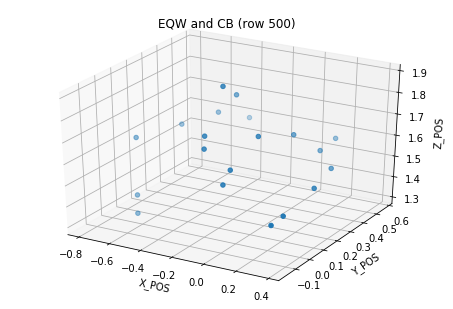

In [6]:
row = kinect_xyz_df.iloc[500]
row_triples = helpers.xyz_triples(row)

fig, ax = plt.subplots(1,1)
ax = Axes3D(fig)
ax.scatter(row_triples['X_POS'], row_triples['Y_POS'], row_triples['Z_POS'])
ax.set_xlabel('X_POS')
ax.set_ylabel('Y_POS')
ax.set_zlabel('Z_POS')
ax.set_title('EQW and CB (row 500)')

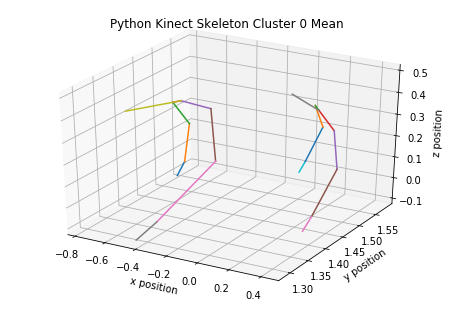

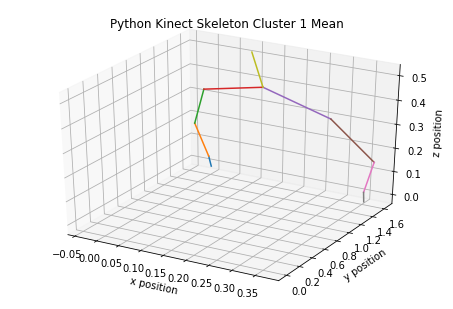

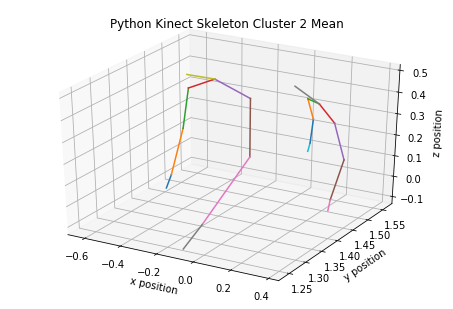

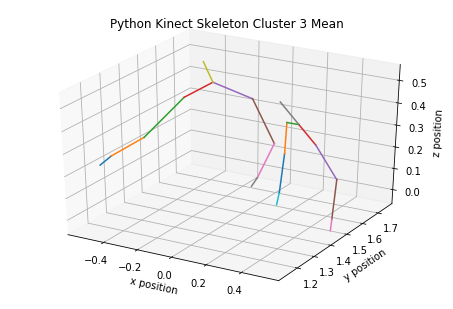

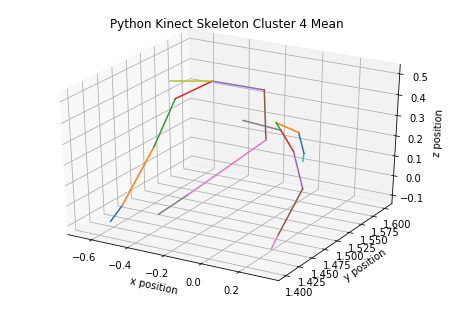

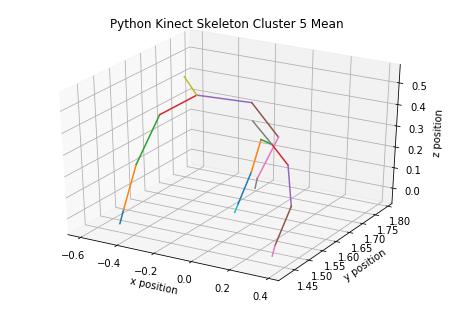

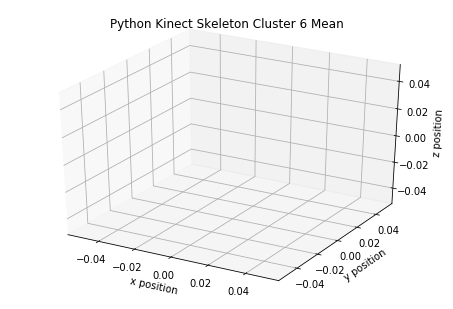

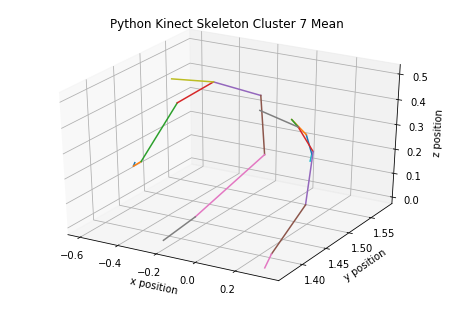

In [7]:
# Group by cluster for individual cluster analysis
clusters = skeleton_df.groupby('ClusterLabel')
SKELETON_FIGS_REPO = 'kinect_eqw_figs/'

for i in range(0, 8):
    cluster = clusters.get_group(i)
    centroid = cluster.mean()
    title = 'Python Kinect Skeleton Cluster ' + str(i) + ' Mean'
    filename = SKELETON_FIGS_REPO +title.replace(' ', '')+'.png'

    fig = plt.figure(5)
    ax = Axes3D(fig)
    helpers.plot_skeleton(ax, centroid)
    ax.set_xlabel('x position')
    ax.set_ylabel('y position')
    ax.set_zlabel('z position')
    ax.set_title(title)
    plt.savefig(filename, dpi=300)
    plt.show()